In [29]:
import pandas as pd 
import numpy as np 
import os
from google.cloud import bigquery
from google.oauth2 import service_account
# declaramos las credenciales al entorno de desarollo
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "..\\..\\bd\\0_docs\\datahub-deacero-adojeda.json"

def Consulta_BQ(consulta):
    """ Funcion que convierte consultas tipo SQL EN PANDAS df"""
    
    client = bigquery.Client()

    query = client.query(consulta)

    df = query.to_dataframe(create_bqstorage_client=True)

    #fact.nom_estado_consignado = fact.nom_estado_consignado.replace({'DISTRITO FEDERAL': 'CIUDAD DE MEXICO'})

    #fact = fact.groupby(["mes_anio", "nom_estado_consignado"]).toneladas_facturadas.sum().unstack(-1).fillna(0)

    df.sort_index(inplace=True, ascending=True)

    return df

query_str = """SELECT 
FORMAT_DATE('%Y-%m-%d', PARSE_DATE('%B.%Y', mes_anio)) AS mes_anio,
cla_cliente_unico, 
cla_cliente,
#nom_grupo_estadistico1,
sum(toneladas_facturadas) AS toneladas_facturadas
FROM `datahub-deacero.mart_comercial.comercial`
WHERE 
#nom_pais_consignado = "MÉXICO"
#AND nom_grupo NOT IN ('EMPRESAS RELACIONADAS','TRASPASOS E INTEREMPRESAS')
#AND nom_grupo_estadistico3  NOT LIKE '%REBAR%'
mes_anio IS NOT NULL
AND
cla_cliente_unico IN (60886, 865, 46429, 22295, 60088, 60034, 12293, 35976, 58, 38022, 4857, 59898, 46140, 6152, 46180, 46563, 11406, 65691)
AND fecha >= '2024-01-01'
AND fecha < '2025-10-01'
GROUP BY 1,2,3
ORDER BY 1,2,3
"""

fact = Consulta_BQ(query_str)

fact.toneladas_facturadas = fact.toneladas_facturadas.astype(float)

map_cli = {60886 : 6,
865: 6,
46429 : 6,
60088 : 6,
22295: 7, 
11406: 7, 
65691: 7, 
60034 :8,
12293:8,
35976:8,
58:8,
38022:8,
4857:8,
59898:8,
46140:8,
6152:8,
46180:8,
46563:8}

fact["START"] = fact.cla_cliente_unico.map(map_cli)

c:\Users\adojeda\OneDrive - deacero.com\dev\0_envs\.bigquery\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [30]:
fact

,mes_anio,cla_cliente_unico,cla_cliente,toneladas_facturadas,START
0,2024-01-01,58,53776,NaN,8
1,2024-01-01,58,818953,0.663,8
2,2024-01-01,865,64700,NaN,6
3,2024-01-01,865,804413,22.848,6
4,2024-01-01,4857,34894,3.948,8
...,...,...,...,...,...
474,2025-09-01,59898,826660,2.119,8
475,2025-09-01,60034,827532,NaN,8
476,2025-09-01,60088,827902,4.637,6
477,2025-09-01,60886,831192,25.416,6


<Axes: xlabel='mes_anio'>

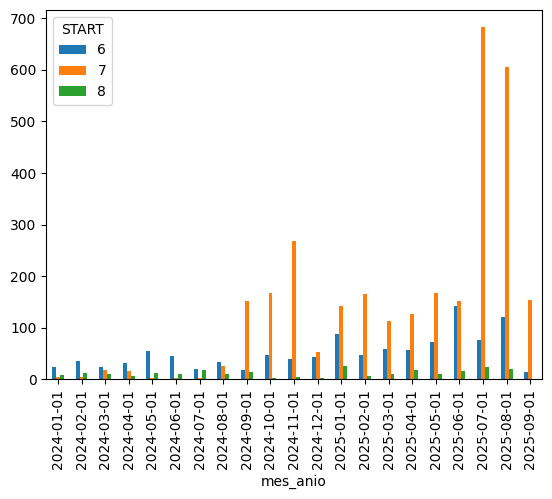

In [36]:
fact.groupby(["mes_anio", "START"]).agg({"cla_cliente_unico": "nunique", "cla_cliente":"nunique", "toneladas_facturadas":"mean"}).toneladas_facturadas.unstack(-1).plot(kind = "bar")

<Axes: xlabel='mes_anio'>

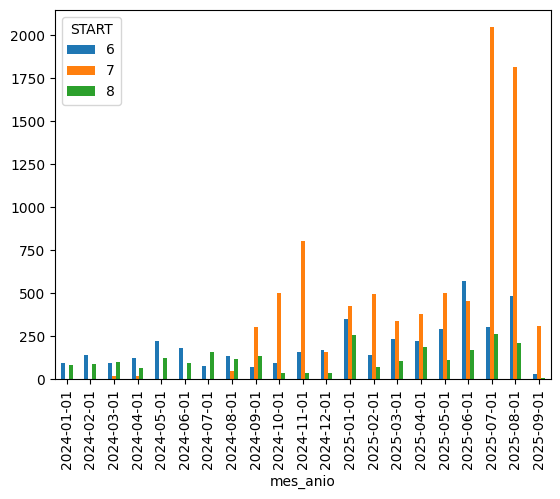

In [ ]:
fact.groupby(["mes_anio", "START"]).agg({"cla_cliente_unico": "nunique", "cla_cliente":"nunique", "toneladas_facturadas":"sum"}).toneladas_facturadas.unstack(-1).plot(kind = "bar", fig)

In [ ]:
fact.cla_cliente_unico.nunique()

fact

41